In [1]:
##upload the json file
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from textblob import TextBlob
import matplotlib.pyplot as plt

Overview of Our DataSet

In [2]:
def load_data(file_path):
    # Load the JSON data into a DataFrame
    df = pd.read_json(file_path, lines=True)
    # Safely extract size and color from the 'style' dictionary
    df['Size'] = df['style'].apply(lambda x: x.get('Size:', 'Size not provided') if isinstance(x, dict) else 'No style info')
    df['Color'] = df['style'].apply(lambda x: x.get('Color:', 'Color not provided') if isinstance(x, dict) else 'No style info')

    # Select and return the required columns
    return df[['overall', 'reviewerID', 'asin', 'Size', 'Color','reviewText','reviewTime']]

# Example usage
file_path = '/Users/tianxiangchen/Desktop/cs 271/AMAZON_FASHION_5.json'
df = load_data(file_path)
print(df.head())  # To display the first few rows of the dataframe


   overall     reviewerID        asin       Size  \
0        5  ALJ66O1Y6SLHA  B000K2PJ4K   Big Boys   
1        5  ALJ66O1Y6SLHA  B000K2PJ4K   Big Boys   
2        5  ALJ66O1Y6SLHA  B000K2PJ4K   Big Boys   
3        5  ALJ66O1Y6SLHA  B000K2PJ4K   Big Boys   
4        5  ALJ66O1Y6SLHA  B000K2PJ4K   Big Boys   

                           Color                reviewText  reviewTime  
0                    Blue/Orange  Great product and price!  09 4, 2015  
1   Black (37467610) / Red/White  Great product and price!  09 4, 2015  
2                 Blue/Gray Logo  Great product and price!  09 4, 2015  
3    Blue (37867638-99) / Yellow  Great product and price!  09 4, 2015  
4                      Blue/Pink  Great product and price!  09 4, 2015  


In [3]:
unique_asins = df['asin'].unique()
print(unique_asins)

['B000K2PJ4K' 'B000KPIHQ4' 'B000V0IBDM' 'B000YFSR5G' 'B000YFSR4W'
 'B0012DR1LU' 'B0014F8TIU' 'B0014HA6VG' 'B0017LD0BM' 'B0017LGD34'
 'B001IKJOLW' 'B001LNSY2Q' 'B0058YEJ5K' 'B0014F7B98' 'B009MA34NY'
 'B0092UF54A' 'B005AGO4LU' 'B00G8Q7JZ4' 'B00GKF5BAS' 'B00I0VHS10'
 'B00LKWYX2I' 'B00MLYE8PQ' 'B00ND9047Y' 'B00RLSCLJM' 'B00ZUA6AJK'
 'B010RRWKT4' 'B014IBJKNO' 'B01595OS62' 'B016XAJLVO' 'B01H7KY678'
 'B003M6060S']


In [4]:
unique_review = df['reviewText'].unique()
for x in unique_review:
    print(x)
    print(" ")
#print(unique_review)

Great product and price!
 
Waaay too small. Will use for futur children!
 
Stays vibrant after many washes
 
My son really likes the pink. Ones which I was nervous about
 
Waaay too small. Will use for future child.
 
Relieved my Plantar Fascitis for 3 Days. Then the unbearable pain returned in full force. These were recommended by my Podiatrist.
 
This is my 6th pair and they are the best thing ever for my plantar fasciitis and resultant neuromas. Unfortunately, the ones I ordered from SmartDestination must be seconds as they kill my feet. The hard plastic insert rubs on the outside edges of my feet. I am unable to exchange them as I waited one day too late to use them in my walking shoes.
 
We have used these inserts for years.  They provide great support.
 
Pinnacle seems to have more cushioning so my husband likes them better. He's tried all the other Powerstep inserts as well as other brands. This is his must have insert. He is 6'3" and weighs 257lbs with bone spurs (plantar fasci

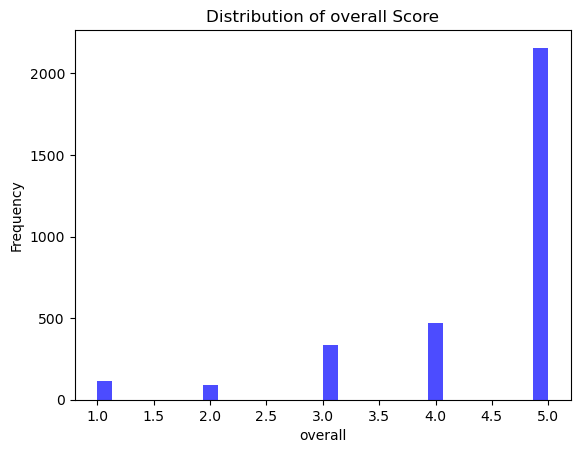

In [6]:
# Check the distribution of Overall variable
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'price' is a continuous variable
plt.hist(df['overall'], bins=30, color='blue', alpha=0.7)
plt.title('Distribution of overall Score')
plt.xlabel('overall')
plt.ylabel('Frequency')
plt.show()

The mean of Overall score for our data is 4.40

In [7]:
df['overall'].mean()

4.404282115869018

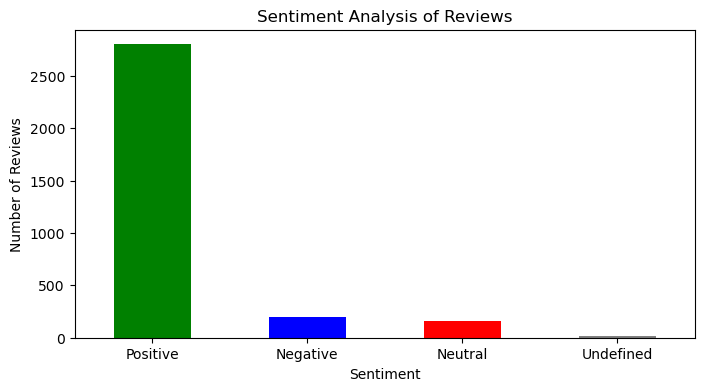

In [8]:
# Function to classify sentiment based on polarity
def classify_sentiment(text):
    try:
        # Ensure the text is a string
        if isinstance(text, str):
            polarity = TextBlob(text).sentiment.polarity
            if polarity > 0:
                return 'Positive'
            elif polarity < 0:
                return 'Negative'
            else:
                return 'Neutral'
        else:
            # Handle non-string text
            return 'Undefined'  # Or you can return 'Neutral' or another default
    except Exception as e:
        return 'Error'  # Optional: Handle any other exception

# Apply sentiment analysis
df['Sentiment'] = df['reviewText'].apply(classify_sentiment)

# Count the occurrences of each sentiment
sentiment_counts = df['Sentiment'].value_counts()

# Plotting
plt.figure(figsize=(8, 4))
sentiment_counts.plot(kind='bar', color=['green', 'blue', 'red', 'gray', 'orange'])
plt.title('Sentiment Analysis of Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.show()

In [9]:
sentiment_counts = df['Sentiment'].value_counts()
print(sentiment_counts)

Sentiment
Positive     2800
Negative      198
Neutral       162
Undefined      16
Name: count, dtype: int64


After implementing the sentiment analysis, we found that the majority of the reviews were classified as positive, with only a few categorized as either negative or neutral. This indicates that most customers are satisfied with our product.

In [10]:
def extract_positive(text):
    # Ensure the text is a string
    if isinstance(text, str):
        return TextBlob(text).sentiment.polarity > 0  # Returns True if sentiment is positive
    else:
        return False  # Handle non-string text by defaulting to False

# Apply sentiment analysis
df['is_positive'] = df['reviewText'].apply(extract_positive)

# Filter for positive reviews
df_positive = df[df['is_positive']]
print(df_positive.head())

   overall     reviewerID        asin       Size  \
0        5  ALJ66O1Y6SLHA  B000K2PJ4K   Big Boys   
1        5  ALJ66O1Y6SLHA  B000K2PJ4K   Big Boys   
2        5  ALJ66O1Y6SLHA  B000K2PJ4K   Big Boys   
3        5  ALJ66O1Y6SLHA  B000K2PJ4K   Big Boys   
4        5  ALJ66O1Y6SLHA  B000K2PJ4K   Big Boys   

                           Color                reviewText  reviewTime  \
0                    Blue/Orange  Great product and price!  09 4, 2015   
1   Black (37467610) / Red/White  Great product and price!  09 4, 2015   
2                 Blue/Gray Logo  Great product and price!  09 4, 2015   
3    Blue (37867638-99) / Yellow  Great product and price!  09 4, 2015   
4                      Blue/Pink  Great product and price!  09 4, 2015   

  Sentiment  is_positive  
0  Positive         True  
1  Positive         True  
2  Positive         True  
3  Positive         True  
4  Positive         True  


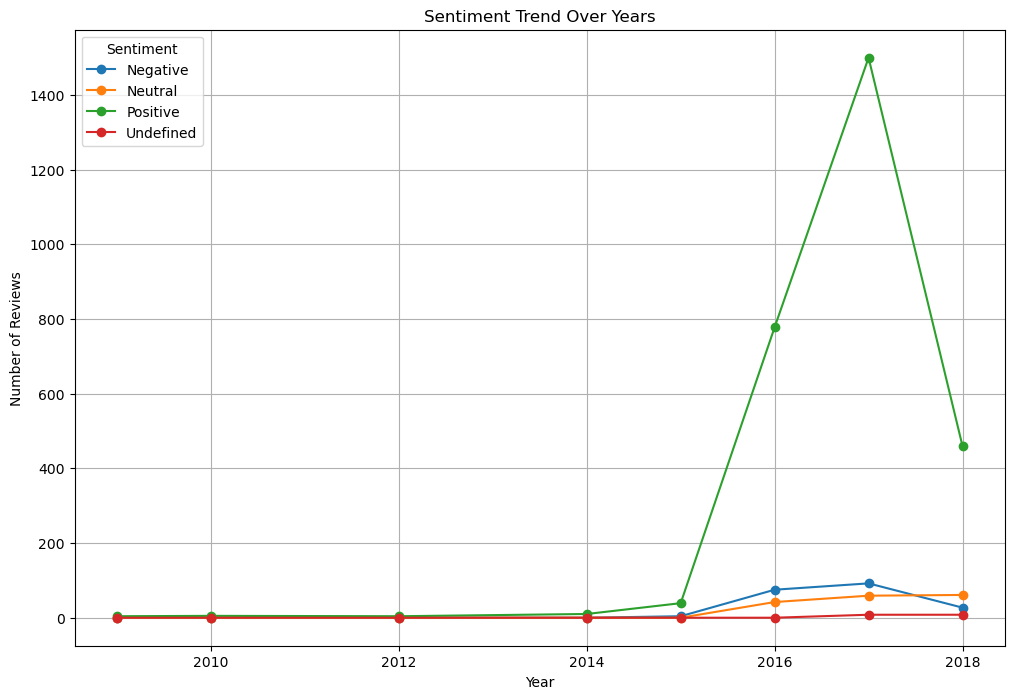

In [11]:
import pandas as pd

# Convert reviewTime to datetime
df['reviewTime'] = pd.to_datetime(df['reviewTime'])

# Extract the year (or any other suitable period)
df['Year'] = df['reviewTime'].dt.year
# Group by Year and Sentiment, and count occurrences
sentiment_counts = df.groupby(['Year', 'Sentiment']).size().unstack(fill_value=0)
import matplotlib.pyplot as plt

# Set up the plot
plt.figure(figsize=(12, 8))

# Plot each sentiment as a separate line
for sentiment in sentiment_counts.columns:
    plt.plot(sentiment_counts.index, sentiment_counts[sentiment], marker='o', label=sentiment)

# Adding plot title and labels
plt.title('Sentiment Trend Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')

# Adding legend to the plot
plt.legend(title='Sentiment')

# Display the grid
plt.grid(True)

# Show the plot
plt.show()


In [70]:
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import LabelEncoder

reviewer_encoder = LabelEncoder()
item_encoder = LabelEncoder()

# Make sure to use df_positive for both fitting the encoder and transforming the data
df_positive = df_positive.copy()
df_positive.loc[:, 'reviewerID_encoded'] = reviewer_encoder.fit_transform(df_positive['reviewerID'])
df_positive.loc[:, 'asin_encoded'] = item_encoder.fit_transform(df_positive['asin'])

# Now you can continue with your sequence data preparation or any further processing


# Prepare sequence data
def create_sequences(data, window_size=3):
    sequences = []
    labels = []
    data = data.groupby('reviewerID_encoded').apply(lambda x: x['asin_encoded'].tolist())
    for sequence in data:
        for i in range(len(sequence) - window_size):
            sequences.append(sequence[i:i+window_size])
            labels.append(sequence[i+1:i+window_size+1])
    return np.array(sequences), np.array(labels)

sequences, labels = create_sequences(df_positive)

In [71]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional, TimeDistributed, BatchNormalization
from tensorflow.keras.regularizers import l2

def build_model(num_items, embedding_dim, rnn_units, dropout_rate=0.3, l2_reg=0.001):
    model = Sequential([
        Embedding(input_dim=num_items, output_dim=embedding_dim, input_length=None),
        
        # First LSTM layer with dropout
        Bidirectional(LSTM(rnn_units, return_sequences=True, kernel_regularizer=l2(l2_reg))),
        Dropout(dropout_rate),
        BatchNormalization(),
        
        # Second LSTM layer
        LSTM(rnn_units, return_sequences=True, kernel_regularizer=l2(l2_reg)),
        Dropout(dropout_rate),
        BatchNormalization(),
        
        # Optionally add more LSTM layers
        # LSTM(rnn_units, return_sequences=True, kernel_regularizer=l2(l2_reg)),
        # Dropout(dropout_rate),
        # BatchNormalization(),
        
        # TimeDistributed layer for output at each time step
        TimeDistributed(Dense(num_items, activation='softmax'))
    ])
    
    # Compile the model
    optimizer = Adam(learning_rate=0.001)  # You can adjust the learning rate
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

In [72]:
import numpy as np
from sklearn.model_selection import KFold
from tensorflow.keras.callbacks import EarlyStopping

# Parameters
num_folds = 5
embedding_dim = 64
rnn_units = 128
dropout_rate = 0.5
num_epochs = 150
batch_size = 128

# Setup K-Fold Cross-Validation
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Assuming 'sequences' and 'labels' are your data prepared earlier
fold_no = 1
loss_per_fold = []
accuracy_per_fold = []

for train_index, test_index in kfold.split(df_positive):
    # Splitting the DataFrame into train and validation DataFrames
    train_df = df_positive.iloc[train_index]
    val_df = df_positive.iloc[test_index]
    
    # Preprocess the train and validation DataFrames to generate sequences and labels
    train_sequences, train_labels = create_sequences(train_df)
    val_sequences, val_labels = create_sequences(val_df)

    # Convert to TensorFlow datasets
    train_dataset = tf.data.Dataset.from_tensor_slices((train_sequences, train_labels))
    train_dataset = train_dataset.shuffle(len(train_sequences)).batch(128).prefetch(tf.data.experimental.AUTOTUNE)
    
    val_dataset = tf.data.Dataset.from_tensor_slices((val_sequences, val_labels))
    val_dataset = val_dataset.batch(128).prefetch(tf.data.experimental.AUTOTUNE)
    
    # Build the model
    model = build_model(df_positive['asin_encoded'].max() + 1, embedding_dim, rnn_units, dropout_rate)
    
    # Fit the model
    print(f'Training for fold {fold_no}...')
    history = model.fit(train_dataset,
                        epochs=num_epochs,
                        validation_data=val_dataset,
                        callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)])
    
    # Evaluate the model on the validation dataset
    scores = model.evaluate(val_dataset, verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]}')
    
    loss_per_fold.append(scores[0])
    accuracy_per_fold.append(scores[1])
    
    fold_no += 1

# Print average scores across all folds
print('Average scores for all folds:')
print(f'Average Loss: {np.mean(loss_per_fold)}')
print(f'Average Accuracy: {np.mean(accuracy_per_fold)}')


Training for fold 1...
Epoch 1/150
10/10 [==============================] - 2s 57ms/step - loss: 3.0808 - accuracy: 0.3746 - val_loss: 3.8408 - val_accuracy: 0.1754
Epoch 2/150
10/10 [==============================] - 0s 8ms/step - loss: 1.7611 - accuracy: 0.7364 - val_loss: 3.7329 - val_accuracy: 0.1754
Epoch 3/150
10/10 [==============================] - 0s 9ms/step - loss: 1.3339 - accuracy: 0.7946 - val_loss: 3.6427 - val_accuracy: 0.1754
Epoch 4/150
10/10 [==============================] - 0s 11ms/step - loss: 1.0677 - accuracy: 0.8379 - val_loss: 3.5645 - val_accuracy: 0.1754
Epoch 5/150
10/10 [==============================] - 0s 11ms/step - loss: 0.9110 - accuracy: 0.8703 - val_loss: 3.4956 - val_accuracy: 0.1930
Epoch 6/150
10/10 [==============================] - 0s 11ms/step - loss: 0.8000 - accuracy: 0.8798 - val_loss: 3.4309 - val_accuracy: 0.1930
Epoch 7/150
10/10 [==============================] - 0s 11ms/step - loss: 0.7231 - accuracy: 0.8873 - val_loss: 3.3762 - val_ac

Training for fold 2...
Epoch 1/150
10/10 [==============================] - 2s 42ms/step - loss: 2.9863 - accuracy: 0.4119 - val_loss: 3.8398 - val_accuracy: 0.1212
Epoch 2/150
10/10 [==============================] - 0s 9ms/step - loss: 1.6650 - accuracy: 0.7676 - val_loss: 3.7353 - val_accuracy: 0.1212
Epoch 3/150
10/10 [==============================] - 0s 10ms/step - loss: 1.3005 - accuracy: 0.8053 - val_loss: 3.6498 - val_accuracy: 0.1212
Epoch 4/150
10/10 [==============================] - 0s 12ms/step - loss: 1.0631 - accuracy: 0.8411 - val_loss: 3.5732 - val_accuracy: 0.1212
Epoch 5/150
10/10 [==============================] - 0s 11ms/step - loss: 0.9017 - accuracy: 0.8671 - val_loss: 3.5072 - val_accuracy: 0.1212
Epoch 6/150
10/10 [==============================] - 0s 14ms/step - loss: 0.7971 - accuracy: 0.8822 - val_loss: 3.4468 - val_accuracy: 0.1212
Epoch 7/150
10/10 [==============================] - 0s 13ms/step - loss: 0.7291 - accuracy: 0.8919 - val_loss: 3.3916 - val_a

Training for fold 3...
Epoch 1/150
10/10 [==============================] - 2s 63ms/step - loss: 2.7553 - accuracy: 0.4453 - val_loss: 3.8409 - val_accuracy: 0.3467
Epoch 2/150
10/10 [==============================] - 0s 9ms/step - loss: 1.5965 - accuracy: 0.7483 - val_loss: 3.7378 - val_accuracy: 0.2933
Epoch 3/150
10/10 [==============================] - 0s 9ms/step - loss: 1.2188 - accuracy: 0.8107 - val_loss: 3.6522 - val_accuracy: 0.2400
Epoch 4/150
10/10 [==============================] - 0s 12ms/step - loss: 1.0100 - accuracy: 0.8462 - val_loss: 3.5773 - val_accuracy: 0.1733
Epoch 5/150
10/10 [==============================] - 0s 12ms/step - loss: 0.8487 - accuracy: 0.8711 - val_loss: 3.5093 - val_accuracy: 0.2000
Epoch 6/150
10/10 [==============================] - 0s 12ms/step - loss: 0.7629 - accuracy: 0.8857 - val_loss: 3.4483 - val_accuracy: 0.2133
Epoch 7/150
10/10 [==============================] - 0s 12ms/step - loss: 0.7004 - accuracy: 0.8869 - val_loss: 3.3932 - val_ac

Training for fold 4...
Epoch 1/150
10/10 [==============================] - 2s 44ms/step - loss: 2.9034 - accuracy: 0.4344 - val_loss: 3.8565 - val_accuracy: 0.1067
Epoch 2/150
10/10 [==============================] - 0s 11ms/step - loss: 1.5944 - accuracy: 0.7823 - val_loss: 3.7636 - val_accuracy: 0.1067
Epoch 3/150
10/10 [==============================] - 0s 12ms/step - loss: 1.2358 - accuracy: 0.8255 - val_loss: 3.6869 - val_accuracy: 0.1067
Epoch 4/150
10/10 [==============================] - 0s 14ms/step - loss: 1.0119 - accuracy: 0.8506 - val_loss: 3.6185 - val_accuracy: 0.1067
Epoch 5/150
10/10 [==============================] - 0s 14ms/step - loss: 0.8683 - accuracy: 0.8749 - val_loss: 3.5579 - val_accuracy: 0.1200
Epoch 6/150
10/10 [==============================] - 0s 13ms/step - loss: 0.7528 - accuracy: 0.8940 - val_loss: 3.5067 - val_accuracy: 0.1200
Epoch 7/150
10/10 [==============================] - 0s 15ms/step - loss: 0.7085 - accuracy: 0.8963 - val_loss: 3.4561 - val_

Training for fold 5...
Epoch 1/150
10/10 [==============================] - 2s 67ms/step - loss: 2.8672 - accuracy: 0.4422 - val_loss: 3.8415 - val_accuracy: 0.1605
Epoch 2/150
10/10 [==============================] - 0s 11ms/step - loss: 1.5948 - accuracy: 0.7829 - val_loss: 3.7436 - val_accuracy: 0.1235
Epoch 3/150
10/10 [==============================] - 0s 11ms/step - loss: 1.2169 - accuracy: 0.8172 - val_loss: 3.6648 - val_accuracy: 0.1235
Epoch 4/150
10/10 [==============================] - 0s 12ms/step - loss: 0.9985 - accuracy: 0.8515 - val_loss: 3.5954 - val_accuracy: 0.1235
Epoch 5/150
10/10 [==============================] - 0s 13ms/step - loss: 0.8540 - accuracy: 0.8755 - val_loss: 3.5319 - val_accuracy: 0.1235
Epoch 6/150
10/10 [==============================] - 0s 13ms/step - loss: 0.7452 - accuracy: 0.8895 - val_loss: 3.4764 - val_accuracy: 0.1235
Epoch 7/150
10/10 [==============================] - 0s 14ms/step - loss: 0.6837 - accuracy: 0.8937 - val_loss: 3.4246 - val_

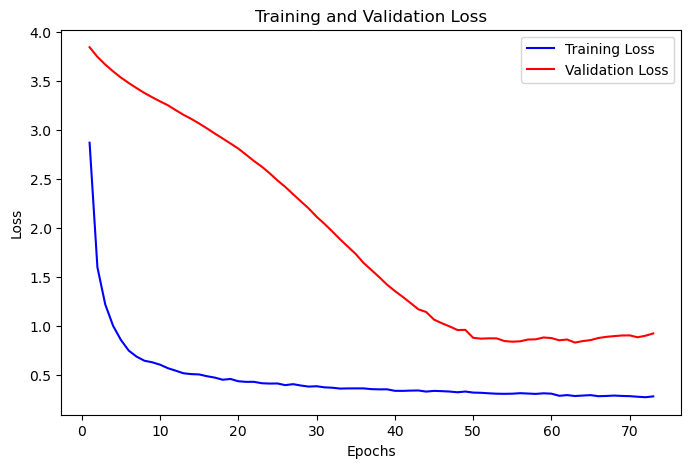

In [75]:
import matplotlib.pyplot as plt

# Assuming 'history' is the object returned by the 'fit' method of your Keras model
# Example: history = model.fit(...)

# Access the history data
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(training_loss) + 1)

# Creating the plot
plt.figure(figsize=(8, 5))
plt.plot(epochs, training_loss, 'b-', label='Training Loss')
plt.plot(epochs, validation_loss, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Display the plot
plt.show()

Before reaching 8 epochs, the training loss decreases rapidly and then converges to 0.5. On the other hand, the validation loss consistently descends until it reaches 50 epochs, after which it begins to flatten out and converges to 1

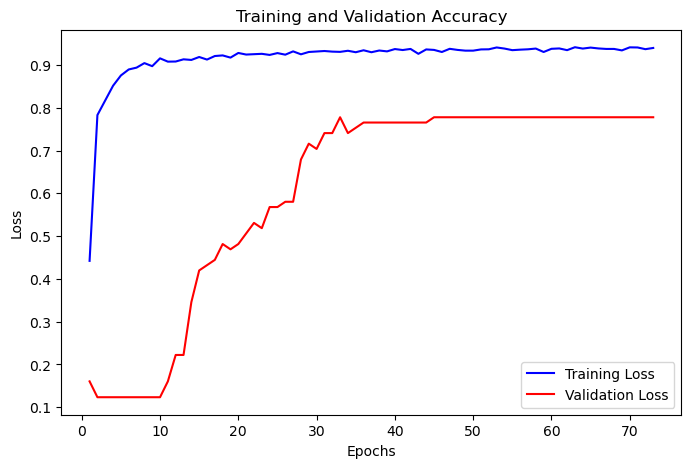

In [76]:
import matplotlib.pyplot as plt

# Assuming 'history' is the object returned by the 'fit' method of your Keras model
# Example: history = model.fit(...)

# Access the history data
training_loss = history.history['accuracy']
validation_loss = history.history['val_accuracy']
epochs = range(1, len(training_loss) + 1)

# Creating the plot
plt.figure(figsize=(8, 5))
plt.plot(epochs, training_loss, 'b-', label='Training Loss')
plt.plot(epochs, validation_loss, 'r-', label='Validation Loss')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Display the plot
plt.show()

For accuracy, the training accuracy increases rapidly before 5 epochs and then starts to converge to 90%. Meanwhile, the validation accuracy consistently rises until it reaches 32 epochs, after which it begins to converge to 77%.

After finish training the Model, we need to check the result to see is product our model generate has very good overall score.

In [130]:
def predict_next_items(model, sequence, top_k=3):
    # Ensure the input sequence is the correct shape
    sequence = np.array(sequence).reshape(1, -1)
    prediction = model.predict(sequence)[0]  # Get predictions for the sequence
    
    # Reshape the prediction to ensure it is 2D (batch_size, num_classes)
    prediction = prediction.reshape(-1, prediction.shape[-1])

    # Get the top_k indices for the last timestep
    recommended_item_indices = np.argsort(prediction[-1])[-top_k:][::-1]

    # Transform indices to original ASINs using the label encoder
    recommended_asins = item_encoder.inverse_transform(recommended_item_indices)
    return recommended_asins

In [131]:
def get_average_overalls(df, asins):
    # Filter the DataFrame for the given ASINs and calculate the average 'overall'
    filtered_df = df[df['asin'].isin(asins)]
    if not filtered_df.empty:
        return filtered_df['overall'].mean()
    else:
        return None

In [153]:
score_list=[]
# Step 1: Initialize and fit the LabelEncoder
all_asins = unique_asins
item_encoder = LabelEncoder()
item_encoder.fit(all_asins)

# Step 2: Encode an input sequence
input_sequence = ["B000K2PJ4K", "B005AGO4LU", "B016XAJLVO", "B009MA34NY", "B001LNSY2Q"]
encoded_sequence = item_encoder.transform(input_sequence)
print(encoded_sequence)
recommended_asins = predict_next_items(model, encoded_sequence)
print("Recommended ASINs:", recommended_asins)
score1 = get_average_overalls(df_positive,recommended_asins)
print(score1)
score_list.append(score1)

[ 0 15 29 17 12]
1/1 [==============================] - 0s 11ms/step
Recommended ASINs: ['B010RRWKT4' 'B0092UF54A' 'B014IBJKNO']
4.5625625625625625


In [154]:
input_sequence=["B000K2PJ4K", "B005AGO4LU", "B016XAJLVO", "B009MA34NY", "B00MLYE8PQ"]
encoded_sequence = item_encoder.transform(input_sequence)
print(encoded_sequence)
recommended_asins = predict_next_items(model, encoded_sequence)
print("Recommended ASINs:", recommended_asins)
score2 = get_average_overalls(df_positive,recommended_asins)
print(score2)
score_list.append(score2)

[ 0 15 29 17 22]
1/1 [==============================] - 0s 12ms/step
Recommended ASINs: ['B010RRWKT4' 'B001IKJOLW' 'B0092UF54A']
4.559475806451613


In [155]:
input_sequence=["B00MLYE8PQ", "B005AGO4LU", "B016XAJLVO", "B00MLYE8PQ", "B00MLYE8PQ"]
encoded_sequence = item_encoder.transform(input_sequence)
print(encoded_sequence)
recommended_asins = predict_next_items(model, encoded_sequence)
print("Recommended ASINs:", recommended_asins)
score3 = get_average_overalls(df_positive,recommended_asins)
print(score3)
score_list.append(score3)

[22 15 29 22 22]
1/1 [==============================] - 0s 11ms/step
Recommended ASINs: ['B001IKJOLW' 'B000YFSR4W' 'B001LNSY2Q']
4.507002801120448


In [156]:
input_sequence=["B00MLYE8PQ", "B005AGO4LU", "B016XAJLVO", "B005AGO4LU", "B00G8Q7JZ4"]
encoded_sequence = item_encoder.transform(input_sequence)
print(encoded_sequence)
recommended_asins = predict_next_items(model, encoded_sequence)
print("Recommended ASINs:", recommended_asins)
score4 = get_average_overalls(df_positive,recommended_asins)
print(score4)
score_list.append(score4)

[22 15 29 15 18]
1/1 [==============================] - 0s 11ms/step
Recommended ASINs: ['B001IKJOLW' 'B010RRWKT4' 'B00I0VHS10']
4.559757942511347


In [157]:
input_sequence=["B00MLYE8PQ", "B010RRWKT4", "B016XAJLVO", "B005AGO4LU", "B003M6060S"]
encoded_sequence = item_encoder.transform(input_sequence)
print(encoded_sequence)
recommended_asins = predict_next_items(model, encoded_sequence)
print("Recommended ASINs:", recommended_asins)
score5 = get_average_overalls(df_positive,recommended_asins)
print(score5)
score_list.append(score5)

[22 26 29 15 13]
1/1 [==============================] - 0s 12ms/step
Recommended ASINs: ['B014IBJKNO' 'B010RRWKT4' 'B001IKJOLW']
4.560040363269425


In [158]:
input_sequence=np.random.choice(unique_asins, size=5, replace=False)
encoded_sequence = item_encoder.transform(input_sequence)
print(encoded_sequence)
recommended_asins = predict_next_items(model, encoded_sequence)
print("Recommended ASINs:", recommended_asins)
score6 = get_average_overalls(df_positive,recommended_asins)
print(score6)
score_list.append(score6)

[ 8 21 14 26  1]
1/1 [==============================] - 0s 12ms/step
Recommended ASINs: ['B014IBJKNO' 'B000V0IBDM' 'B000KPIHQ4']
4.561046511627907


In [159]:
input_sequence=np.random.choice(unique_asins, size=5, replace=False)
encoded_sequence = item_encoder.transform(input_sequence)
print(encoded_sequence)
recommended_asins = predict_next_items(model, encoded_sequence)
print("Recommended ASINs:", recommended_asins)
score7 = get_average_overalls(df_positive,recommended_asins)
print(score7)
score_list.append(score7)

[22  4 23 14 16]
1/1 [==============================] - 0s 12ms/step
Recommended ASINs: ['B005AGO4LU' 'B010RRWKT4' 'B0092UF54A']
4.562


In [161]:
input_sequence=np.random.choice(unique_asins, size=5, replace=False)
encoded_sequence = item_encoder.transform(input_sequence)
print(encoded_sequence)
recommended_asins = predict_next_items(model, encoded_sequence)
print("Recommended ASINs:", recommended_asins)
score8 = get_average_overalls(df_positive,recommended_asins)
print(score8)
score_list.append(score8)

[ 7 14 29 20 10]
1/1 [==============================] - 0s 12ms/step
Recommended ASINs: ['B010RRWKT4' 'B014IBJKNO' 'B000YFSR5G']
4.523876404494382


In [162]:
input_sequence=np.random.choice(unique_asins, size=5, replace=False)
encoded_sequence = item_encoder.transform(input_sequence)
print(encoded_sequence)
recommended_asins = predict_next_items(model, encoded_sequence)
print("Recommended ASINs:", recommended_asins)
score9 = get_average_overalls(df_positive,recommended_asins)
print(score9)
score_list.append(score9)

[ 4 21 11 19 15]
1/1 [==============================] - 0s 12ms/step
Recommended ASINs: ['B010RRWKT4' 'B014IBJKNO' 'B00I0VHS10']
4.56437125748503


In [163]:
input_sequence=np.random.choice(unique_asins, size=5, replace=False)
encoded_sequence = item_encoder.transform(input_sequence)
print(encoded_sequence)
recommended_asins = predict_next_items(model, encoded_sequence)
print("Recommended ASINs:", recommended_asins)
score10 = get_average_overalls(df_positive,recommended_asins)
print(score10)
score_list.append(score10)

[21  2 20 24 18]
1/1 [==============================] - 0s 12ms/step
Recommended ASINs: ['B00RLSCLJM' 'B00G8Q7JZ4' 'B001IKJOLW']
4.573529411764706


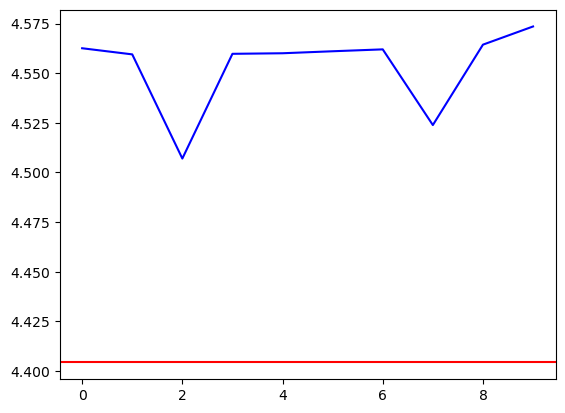

In [170]:
# Plotting the score list
plt.plot(score_list, '-b', label='Scores')  # Blue line for scores

# Add a horizontal red line at the mean of the 'overall' ratings
plt.axhline(y=df['overall'].mean(), color='r', linestyle='-', label='Average Overall Rating')

As shown above, after using our model to predict 10 times, the mean overall score (indicated in blue) corresponding to the recommended ASINs consistently exceeds the mean overall score of our complete dataset (indicated in red).